# 聚类分析

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans,AgglomerativeClustering

## 一、K均值聚类
K均值聚类法是一种“自上而下的方法”，由于其全局最小解的算法过于复杂，故使用如下的迭代算法：
1. 随机选择每个聚类的中心位置（初始化）。
2. 循环执行以下两步，直至收敛：
   >分配过程，将每个观测值重新分配到离其最近的聚类；
   
   >更新过程，更新分配后的每个聚类的质心centroid。

In [5]:
data=sns.load_dataset('iris')
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
dic={'setosa':0,'versicolor':1,'virginica':2}
data.species=data.species.map(dic)

Text(0.5, 0, 'petal_length')

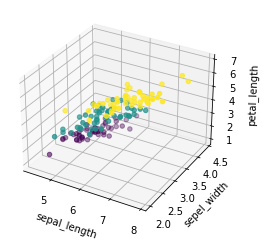

In [8]:
fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')
ax.scatter(data['sepal_length'],data['sepal_width'],data['petal_length'],c=data['species'])
ax.set_xlabel('sepal_length')
ax.set_ylabel('sepel_width')
ax.set_zlabel('petal_length')

KMeans类主要参数介绍：
1. n_clusters，选择聚类个数K，默认为8。
2. init，选择初始化的方法，有‘k-means++’和‘random’两种选项，前者表示以一种优化的方式选择每个聚类的中心位置，从而加快收敛的速度，后者表示随机进行初始化，默认为random。
3. n_init，选择初始化的次数，使局部最小值尽量接近全局最小值，默认次数为10。
4. algorithm,有“auto”, “full”, “elkan”三种选项，full表示使用最大期望算法EM；对于界限较为清晰的数据，elkan通过使用三角不等式以提高效率；auto表示选择elkan，默认选择auto。

In [11]:
X=data.iloc[:,:3]
y=data.iloc[:,-1]
model=KMeans(n_clusters=3,n_init=20,random_state=1)
model.fit(X)

KMeans(n_clusters=3, n_init=20, random_state=1)

cluster_centers_属性，返回每个聚类的质心坐标。

In [13]:
model.cluster_centers_

array([[5.006     , 3.428     , 1.462     ],
       [6.83571429, 3.06428571, 5.6547619 ],
       [5.84655172, 2.73275862, 4.3637931 ]])

labels_属性，返回每个样本的聚类归属。

In [12]:
model.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2], dtype=int32)

inertia_属性，返回SSE误差平方和，即$$SSE=\sum_{k=1}^{K}\sum_{i\in C_k}||x_i-c_k||^2$$

In [14]:
model.inertia_

69.42973924466338

此外，KMeans类还有以下属性：
1. n_iter_表示迭代次数。
2. n_features_in_表示特征变量个数

In [19]:
model=KMeans(n_clusters=3,n_init=30,random_state=1)
model.fit(X)
model.inertia_

69.42973924466338

In [20]:
model=KMeans(n_clusters=3,n_init=1000,random_state=1)
model.fit(X)
model.inertia_

69.42973924466338

进行30次1000次初始化的SSE与进行20次初始化的SSE相等，表明69.43很可能是全局最小值。下面确定K。

In [23]:
sse=[]
for k in range(1,16):
    model=KMeans(n_clusters=k,n_init=20,random_state=1)
    sse.append(model.fit(X).inertia_)

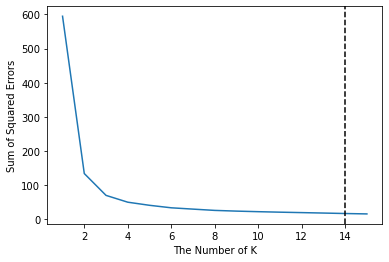

In [36]:
def plot_sse(sse,vertical_line=1):
    plt.plot(range(1,16),sse)
    plt.xlabel('The Number of K')
    plt.ylabel('Sum of Squared Errors')
    if vertical_line==True:
        plt.axvline(np.argmin(sse),linestyle='--',color='k')
plot_sse(sse)

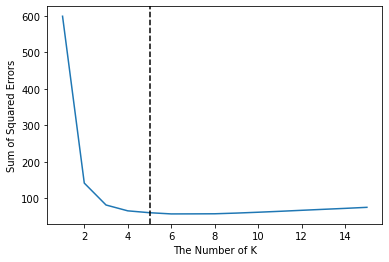

In [37]:
p=2#特征维数
aic=sse+2*p*np.arange(1,16)
plot_sse(aic,vertical_line=1)

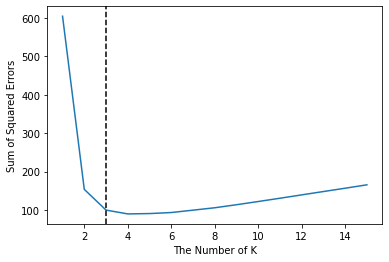

In [38]:
bic=sse+2*np.log(len(data))*range(1,16)
plot_sse(bic,vertical_line=1)

由上述三种选择K的方法：手肘法、AIC信息准则和BIC信息准则得到的最优K分布为3、5、3。

In [39]:
model=KMeans(n_clusters=3,n_init=20,random_state=1)
model.fit(X)

KMeans(n_clusters=3, n_init=20, random_state=1)

In [51]:
labels=pd.DataFrame(model.labels_,columns=['yhat'])
pred=labels.yhat.map({0:0,2:1,1:2})

Text(0.5, 0.92, 'Actual Values')

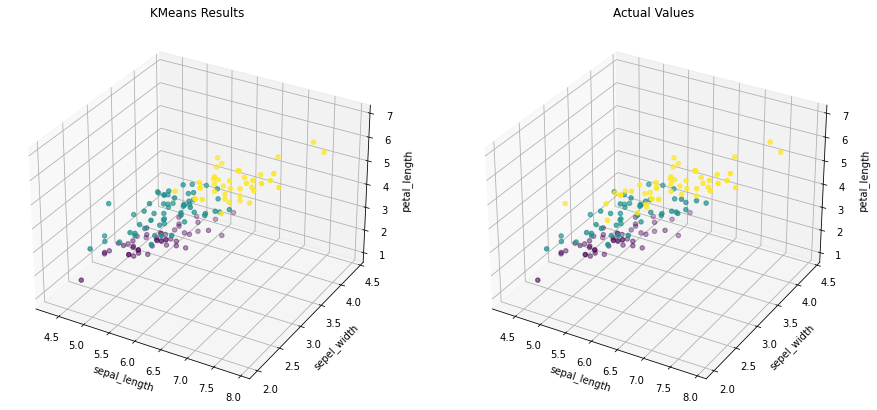

In [59]:
fig=plt.figure(figsize=(15,7))
ax1=fig.add_subplot(121,projection='3d')
ax1.scatter(data['sepal_length'],data['sepal_width'],data['petal_length'],c=pred)
ax1.set_xlabel('sepal_length')
ax1.set_ylabel('sepel_width')
ax1.set_zlabel('petal_length')
ax1.set_title('KMeans Results')

ax2=fig.add_subplot(122,projection='3d')
ax2.scatter(data['sepal_length'],data['sepal_width'],data['petal_length'],c=data['species'])
ax2.set_xlabel('sepal_length')
ax2.set_ylabel('sepel_width')
ax2.set_zlabel('petal_length')
ax2.set_title('Actual Values')